In [277]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,StandardScaler, robust_scale
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_samples, silhouette_score


In [278]:
os.chdir(path="C:/Users/DELL/Desktop/Unsupervised assignment")
carDataSet = pd.read_csv("cars-dataset.csv")
originalDataSet = carDataSet.copy()

carDataSet.head(30)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [279]:
# cyl and yr are multvaread discrete features
# as distance metric is used as a measure for the clustering technique

labbin = LabelBinarizer()
cylfeature = labbin.fit_transform(carDataSet.cyl)

cyldf = pd.DataFrame(data=cylfeature,columns=['3cyl','4cyl','5cyl','6cyl','8cyl'])
cyldf['cyl'] = carDataSet['cyl']


cylMerged = pd.merge(left=carDataSet,right=cyldf,on='cyl')


"""
yrfeature = labbin.fit_transform(carDataSet.yr)
yrfeature

yrdf = pd.DataFrame(data=yrfeature, columns=carDataSet['yr'].unique())
yrdf

yrdf['yr'] = carDataSet['yr']

pd.merge(left=carDataSet, right=yrdf, on='yr')

"""

"\nyrfeature = labbin.fit_transform(carDataSet.yr)\nyrfeature\n\nyrdf = pd.DataFrame(data=yrfeature, columns=carDataSet['yr'].unique())\nyrdf\n\nyrdf['yr'] = carDataSet['yr']\n\npd.merge(left=carDataSet, right=yrdf, on='yr')\n\n"

In [235]:
carDataSet.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [236]:
carDataSet.dtypes
# Car name and hp are object type
# Car name is not required for the clustering
# hp column has numeric data, but still represented as object type. check for missing values(Nas , NaN or ?)

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [237]:
carDataSet.isna().sum()
# no NAs and NaN, some non-numeric entries are there in hp column making the entire column to be object type

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [238]:
carDataSet.loc[carDataSet['hp'] == '?']
# hp column had ?,  need to remove/replace/impute these ?

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [210]:
carDataSet.loc[carDataSet['hp'] == '?',['hp']] = 0
# filling ? with 0's

In [211]:
(carDataSet[['cyl','disp','hp','wt','acc','yr','mpg']] == 0).sum()

# other numercial colums are having non-zeros, and hp column ? has been replaced with 0's

cyl     0
disp    0
hp      6
wt      0
acc     0
yr      0
mpg     0
dtype: int64

In [212]:
carDataSet.hp = carDataSet.hp.astype(dtype='int64')
# converted the hp column to interger type

carDataSet.dtypes

car name     object
cyl           int64
disp        float64
hp            int64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [213]:
carDataSet.hp.describe()

count    398.000000
mean     102.894472
std       40.269544
min        0.000000
25%       75.000000
50%       92.000000
75%      125.000000
max      230.000000
Name: hp, dtype: float64

array([8, 4, 6, 3, 5], dtype=int64)

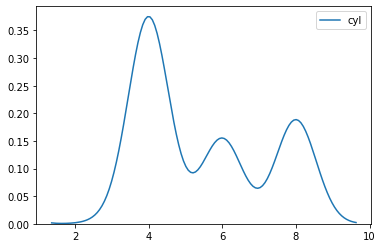

In [231]:
# density curve/box plot 
sns.kdeplot(carDataSet['cyl'])
carDataSet['cyl'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

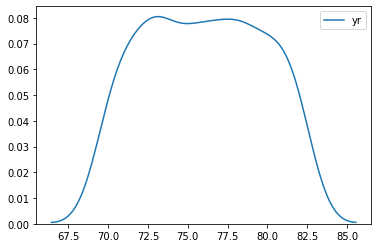

In [232]:
sns.kdeplot(carDataSet['yr'])
carDataSet['yr'].unique()

In [181]:
carDataSet.loc[carDataSet['hp'] == 0,['hp']] = carDataSet.hp.median()

carDataSet.loc[carDataSet['hp'] == 92.0,['hp']]

,hp
32,92.0
81,92.0
126,92.0
184,92.0
320,92.0
330,92.0
336,92.0
340,92.0
354,92.0
373,92.0


In [182]:
# Dropping car name as only numerical data is required for the clustering technique
carDataSet.set_index(keys='car name', inplace=True)
carDataSet.head(10)

,cyl,disp,hp,wt,acc,yr,mpg
car name,,,,,,,
chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
ford torino,8,302.0,140.0,3449,10.5,70,17.0
ford galaxie 500,8,429.0,198.0,4341,10.0,70,15.0
chevrolet impala,8,454.0,220.0,4354,9.0,70,14.0
plymouth fury iii,8,440.0,215.0,4312,8.5,70,14.0
pontiac catalina,8,455.0,225.0,4425,10.0,70,14.0


In [191]:
scalar = StandardScaler()
scalar.fit(carDataSet)
scaledData = scalar.transform(carDataSet)

scaledData

array([[ 1.49819126,  1.0906037 ,  0.67358934, ..., -1.29549834,
        -1.62742629, -1.73787284],
       [ 1.49819126,  1.5035143 ,  1.59026573, ..., -1.47703779,
        -1.62742629, -1.73787284],
       [ 1.49819126,  1.19623199,  1.19740442, ..., -1.65857724,
        -1.62742629, -1.73787284],
       ...,
       [-0.85632057, -0.56103873, -0.53118534, ..., -1.4407299 ,
         1.62198339,  0.57541609],
       [-0.85632057, -0.70507731, -0.66213911, ...,  1.10082237,
         1.62198339,  0.57541609],
       [-0.85632057, -0.71467988, -0.58356685, ...,  1.39128549,
         1.62198339,  0.57541609]])

In [192]:
model = linkage(y=scaledData, method='ward', metric='euclidean')


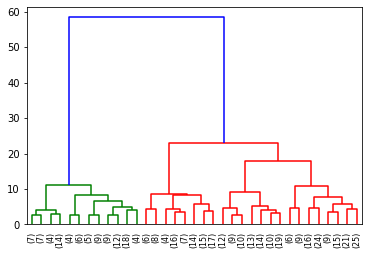

In [193]:
dendrogram(Z=model,p=35,truncate_mode='lastp',leaf_rotation=90.,leaf_font_size=8.)
plt.show()

In [186]:
max_clust = 2
formedClusters = fcluster(Z=model,t=max_clust,criterion='maxclust')

In [194]:
formedClusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [197]:
silhouette_samples(X=scaledData, labels=formedClusters)

array([ 0.57987614,  0.66762364,  0.61429035,  0.61092726,  0.58327436,
        0.65033706,  0.60175311,  0.60145109,  0.60824963,  0.61662931,
        0.63822826,  0.57903855,  0.62605506,  0.54329278,  0.51828243,
        0.37865255,  0.37873949,  0.42061604,  0.52127454,  0.5230976 ,
        0.53828052,  0.5128877 ,  0.54107511,  0.41483598,  0.38899307,
        0.62521775,  0.60987981,  0.63162507,  0.48263193,  0.55077401,
        0.55906349,  0.52728686,  0.56313211,  0.29300147,  0.27972033,
        0.27958111,  0.31268285,  0.30928019,  0.71787783,  0.70813417,
        0.70104065,  0.69208111,  0.68545289,  0.70145259,  0.67250958,
        0.21251439,  0.5666017 ,  0.27042622,  0.30280068,  0.53522362,
        0.53315704,  0.56856559,  0.55718734,  0.56874848,  0.57068624,
        0.57008731,  0.55065638,  0.58887337,  0.61307297,  0.4992932 ,
        0.57290537,  0.60727278,  0.73305893,  0.72420356,  0.70411899,
        0.72483174,  0.66738624,  0.66544272,  0.7173226 ,  0.72

In [198]:
silhouette_score(X=scaledData, labels=formedClusters)

0.5703352895114708

In [195]:
carDataSet['Clusters'] = formedClusters

In [196]:
carDataSet

,cyl,disp,hp,wt,acc,yr,Clusters
car name,,,,,,,
chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,8,304.0,150.0,3433,12.0,70,1
ford torino,8,302.0,140.0,3449,10.5,70,1
ford galaxie 500,8,429.0,198.0,4341,10.0,70,1
chevrolet impala,8,454.0,220.0,4354,9.0,70,1
plymouth fury iii,8,440.0,215.0,4312,8.5,70,1
pontiac catalina,8,455.0,225.0,4425,10.0,70,1
